# Projeto 2: Multi-core
### Filipe F. Borba  
### Insper
### Super Computação, Prof. Igor Montagner


- CMakeLists.txt que gere um executável por método testado
- Relatório feito em Jupyter Notebook ou PWeave. Seu relatório deve conter as seguintes seções:
 - Descrição do problema tratado
 - Descrição dos testes feitos (tamanho de entradas, quantas execuções são feitas, como mediu tempo)
 - Organização em alto nível de seu projeto.
- Versão já rodada do relatório exportada para PDF
- README.txt explicando como rodar seus testes
- Conjunto de testes automatizados (via script Python ou direto no relatório)
- Respeitar os formatos de entrada e saída definidos na seção anterior

## Introdução

O problema explorado nesse projeto é o algoritmo do Caixeiro Viajante. Este problema encontra-se na área de Otimização discreta, que estuda problemas de otimização baseados em uma sequência de escolhas e que a solução ótima só pode ser encontrada se enumerarmos todas as escolhas possíveis. Em outras palavras, só conseguimos achar a solução ótima se tivermos todas as soluções possíveis. Assim, não existem algoritmos mais eficientes de resolução, pois todos tem complexidade O(2^n) ou pior.

Ao realizar esse teste das sequências de escolhas em paralelo, podemos diminuir consideravelmente o consumo de tempo do programa, o que é bastante interessante para computacão paralela.

O problema do Caixeiro Viajante é o seguinte:

<img src="https://camo.githubusercontent.com/a4d91635c96d345fc31068a4420834d23654f82b/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f312f31312f474c504b5f736f6c7574696f6e5f6f665f615f74726176656c6c696e675f73616c65736d616e5f70726f626c656d2e7376672f35313270782d474c504b5f736f6c7574696f6e5f6f665f615f74726176656c6c696e675f73616c65736d616e5f70726f626c656d2e7376672e706e67" alt="TSP" style="width: 300px;"/>

```Um vendedor possui uma lista de empresas que ele deverá visitar em um certo dia. Não existe uma ordem fixa: desde que todos sejam visitados seu objetivo do dia está cumprido. Interessado em passar o maior tempo possível nos clientes ele precisa encontrar a sequência de visitas que resulta no menor caminho.```

Para nosso projeto em específico, temos algumas simplificações:
- o nosso caixeiro usa Waze e já sabe qual é o caminho com a menor distância entre dois pontos;
- ele começa seu trajeto na empresa 0. Ou seja, basta ele encontrar um trajeto que passe por todas as outras e volte a empresa ```0```;
- ele não pode passar duas vezes na mesma empresa. Ou seja, a saída é uma permutação de ```0 ... (N-1)```



Finalmente, os objetivos deste projeto são

1. implementar uma versão sequencial em C++ do caixeiro viajante a partir de uma implementação em Python.
2. Estudar e implementar os seguintes métodos paralelos:
    * enumeracão exaustiva em paralelo
    * busca local paralela usando 2-opt
    * branch and bound (ou heuristic search)

** Como descrito em https://github.com/Insper/supercomp/blob/master/projeto-02/enunciado.md

## Branch and Bound

Um dos métodos de paralelismo utilizados foi o branch and bound, que melhora o tempo de execução do algoritmo drasticamente. A ideia do Branch and Bound é ignorar o resto dos caminhos de uma subárvore de recursão caso seu custo atual já seja pior do que o melhor custo calculado. Com isso, realizamos menos operações e ganhamos desempenho.

## Organização do Projeto

O projeto foi realizado utilizando a linguagem C++ e o compilador g++ do Ubuntu Linux com a biblioteca OpenMP. Temos, então, alguns arquivos diferentes.

* Arquivo tsp.py, que implenta o método de enumeração exaustiva sequencial em Python. (Este serve como referência para os outros).
* Arquivo tsp_seq.cpp, que implementa o mesmo método, porém em C++.
* Arquivo tsp_par.cpp, que implementa o método de enumeração exaustiva em paralelo.

OBS: temos o arquivo ```gerador.py``` para gerar uma entrada fixa para que possamos testar a mesma entrada em diferentes executáveis. Para usá-lo e salvar uma entrada, basta utilizar o comando na pasta raíz do projeto

```echo N | python3 gerador.py > ./tests/nome_da_entrada```, 

onde N é o número de pontos.

Além disso, o projeto possui um CMakeLists.txt que possibilita a compilação dos executáveis. São eles:
* tsp_seq (sequencial)
* tsp_par (paralelo)
* time_tsp_seq (sequencial com print do tempo)
* time_tsp_par (paralelo com print do tempo)

Para compilar todos os executáveis, basta usar os seguintes comandos na pasta raíz do projeto:

```mkdir build; cd build; cmake ..; make ```

O comando ```make``` é responsável por compilar os executáveis.
Após isso, para iniciar cada executável, basta utilizar o comando 

```./nome_do_arquivo < ../tests/nome_da_entrada```

dentro da pasta ```build```.

Caso queira rodar o arquivo em Python, utilize

```python3 tsp.py < ./tests/nome_da_entrada```

## Resultados

### Testes Básico
Nesta seção, vamos testar os diferentes executáveis com uma entrada com 5 e outra com 6 pontos. Com isso, podemos verificar se nossas saídas estão dentro do esperado, usando a saída do programa em Python como referência.

OBS: Os arquivos de teste usados estarão sempre com o número de pontos no nome do arquivo.

In [1]:
%matplotlib inline
import os
import subprocess

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Pegar o nome dos executaveis
executables = sorted([n for n in os.listdir("./build/") if n.startswith('tsp')])
executables

['tsp_bb', 'tsp_par', 'tsp_seq']

In [3]:
# Pegar o nome das entradas menores
inputs = sorted([n for n in os.listdir("./tests/") if n.startswith('in0')])
inputs

['in05.txt', 'in06.txt']

In [4]:
def run_basic_test(executable, input_file):
    with open('./tests/' + input_file, 'rb', 0) as f:
        output = subprocess.check_output(['./build/' + str(executable)], stdin=f)
        output = output.decode("utf-8").splitlines()
     
    print(f"--{executable}------{input_file}--")
    print("\n".join(output))

def run_basic_test_python(executable, input_file):
    with open('./tests/' + input_file, 'rb', 0) as f:
        output = subprocess.check_output(['python3', executable], stdin=f)
        output = output.decode("utf-8").splitlines()
     
    print(f"--{executable}------{input_file}--")
    print("\n".join(output))

In [5]:
# Caso queira rodar todos os testes básicos, use:
py_script = "tsp.py"

for i in inputs:
    run_basic_test_python(py_script, i)
    for e in executables:
        run_basic_test(e, i)

--tsp.py------in05.txt--
18599.56718 1
0 3 1 2 4
--tsp_bb------in05.txt--
18599.56718 1
0 3 1 2 4 
--tsp_par------in05.txt--
18599.56718 1
0 4 2 1 3 
--tsp_seq------in05.txt--
18599.56718 1
0 3 1 2 4 
--tsp.py------in06.txt--
6301.16236 1
0 3 2 5 1 4
--tsp_bb------in06.txt--
6301.16236 1
0 3 2 5 1 4 
--tsp_par------in06.txt--
6301.16236 1
0 3 2 5 1 4 
--tsp_seq------in06.txt--
6301.16236 1
0 3 2 5 1 4 


# Testes de Desempenho

Aqui estamos preocupados com a diferença de desempenho, então o tamanho das entradas é maior. O tempo foi medido a partir da biblioteca <chrono> e o high_resolution_clock. Como validamos nossa saída com os testes básicos, não precisamos rodar o programa em Python, pois ele demora muito mais do que os outros.
    
OBS: outros executáveis foram criados para que a saída devolvesse o tempo, mas o código neles é igual.

In [6]:
def run_test(executable, input_file):
    with open('./tests/' + input_file, 'rb', 0) as f:
        output = subprocess.check_output(['./build/' + str(executable)], stdin=f)
        output = output.decode("utf-8").splitlines()
     
    print(f"--{executable}------{input_file}--")
    print("\n".join(output))
    return [executable, input_file, output[0]]

In [7]:
# Vamos rodar os testes pesados e colher dados de desempenho
executables = sorted([n for n in os.listdir("./build/") if n.startswith('time')])
inputs = sorted([n for n in os.listdir("./tests/") if n.startswith('in1')])
data = []
for i in inputs:
    for e in executables:
        data.append(run_test(e, i))

--time_tsp_bb------in10.txt--
27
milisegundo(s).
6303.41552 1
0 9 5 2 1 7 8 3 4 6 
--time_tsp_par------in10.txt--
49
milisegundo(s).
6303.41552 1
0 9 5 2 1 7 8 3 4 6 
--time_tsp_seq------in10.txt--
26
milisegundo(s).
6303.41552 1
0 9 5 2 1 7 8 3 4 6 
--time_tsp_bb------in12.txt--
698
milisegundo(s).
15761.98802 1
0 9 5 2 7 1 8 6 4 10 11 3 
--time_tsp_par------in12.txt--
4685
milisegundo(s).
15761.98802 1
0 9 5 2 7 1 8 6 4 10 11 3 
--time_tsp_seq------in12.txt--
2156
milisegundo(s).
15761.98802 1
0 9 5 2 7 1 8 6 4 10 11 3 


In [8]:
df = pd.DataFrame(data, dtype=np.float64)
df

,0,1,2
0,time_tsp_bb,in10.txt,27.0
1,time_tsp_par,in10.txt,49.0
2,time_tsp_seq,in10.txt,26.0
3,time_tsp_bb,in12.txt,698.0
4,time_tsp_par,in12.txt,4685.0
5,time_tsp_seq,in12.txt,2156.0


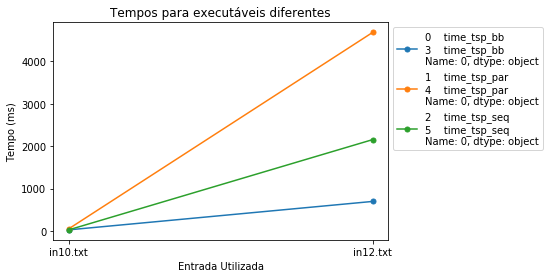

In [9]:
groups = df.groupby(0)

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group[1], group[2], marker='o', linestyle='-', ms=5, label=group[0])
plt.title('Tempos para executáveis diferentes')
plt.ylabel('Tempo (ms)')
plt.xlabel('Entrada Utilizada')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Como podemos verificar no gráfico acima, o algoritmo paralelo acaba sendo bem mais devagar que os demais. Isso ocorre, pois, além da criação de tasks ser custosa, a presença de um "#pragma omp critical" também acaba prejudicando o desempenho, dado que é necessário esperar uma task passar por aquele bloco de código para que outra também possa fazê-lo. O método sequencial acaba virando uma referência, pois é rápido e segue a busca exaustiva sem muitos artefatos. Por fim, o método de Branch and Bound é muito mais rápido que os demais, pois além de ser paralelo, realiza menos operações do que os outros algoritmos, pois acaba ignorando certos caminhos quando eles já estão piores que a melhor solução atual encontrada.